> # Intrusion Detection Systems (IDSs) 

# PROBLEM STATEMENT



Scikitlearn

READ ME

=======

Problem Statement: Intrusion Detection Systems (IDSs) and Intrusion Prevention Systems (IPSs) are the most important defense tools against the sophisticated and ever-growing network attacks. Given network flow data, can we detect different network attacks? (Download the attached file & unzip to fetch the data)

Network attacks : There are different types of network attacks such as DoS Hulk, DoS GoldenEye, DoS slowloris, DoS Slowhttptest.

Features : Total 80 features are taken from network flow data, including Label. 

ID : record id 

Label : BENIGN(Normal), DoS(Attack)

Packet info : 'Total Fwd Packets','Total Backward Packets', 'Total Length of Fwd Packets',

	          'Total Length of Bwd Packets', 'Fwd Packet Length Max',

	          'Fwd Packet Length Min', 'Fwd Packet Length Mean',

	          'Fwd Packet Length Std', 'Bwd Packet Length Max',

	          'Bwd Packet Length Min', 'Bwd Packet Length Mean',

	          'Bwd Packet Length Std'

Payload info : 'Flow Bytes/s', 'Flow Packets/s',

              'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',

              'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',

              'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',

              'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',

              'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',

              'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',

              'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',

              'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',

              'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',

              'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',

              'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',

              'Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk',

              'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk',

              'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',

              'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward',

              'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward'

Session info : 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',

              'Idle Std', 'Idle Max', 'Idle Min'



What to Do?

===========

Build a Machine Learning model which can detect the network attacks. 



Submission Details

==================

- A zip file containing your code (.ipynb file or .py file or r notebook), with final model and prediction results in .csv format.




### Importing the required Libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import missingno as mn # for missing values visualization
from wordcloud import WordCloud as wc # for most highlighted words visualization
from wordcloud import STOPWORDS as sw # this will help ignoring english stop words in string value
from sklearn.preprocessing import StandardScaler # for stardardizing the data to the normal scale
from sklearn.model_selection import train_test_split # for splitting data into train and test
from sklearn.tree import DecisionTreeClassifier # Decision Tree model classifier
from sklearn.ensemble import RandomForestClassifier # RandomForest model classification
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.metrics import classification_report,confusion_matrix # classification report purposes


import warnings
warnings.filterwarnings("ignore")

### Reading the dataset

In [1]:
train_df =  pd.read_csv("IDS_train.csv")
train_df

NameError: name 'pd' is not defined

> ### EDA
Exploratory Data Analysis (EDA) is the process of systematically examining and summarizing a dataset to gain insights into the underlying structure and relationships within the data.

In [78]:
# shape of the data
train_df.shape

(129879, 80)

In [3]:
129879-200

129679

In [79]:
# summary of the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129879 entries, 0 to 129878
Data columns (total 80 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           129879 non-null  int64  
 1   Destination Port             129879 non-null  int64  
 2   Flow Duration                129879 non-null  int64  
 3   Total Fwd Packets            129879 non-null  int64  
 4   Total Backward Packets       129879 non-null  int64  
 5   Total Length of Fwd Packets  129879 non-null  int64  
 6   Total Length of Bwd Packets  129879 non-null  int64  
 7   Fwd Packet Length Max        129879 non-null  int64  
 8   Fwd Packet Length Min        129879 non-null  int64  
 9   Fwd Packet Length Mean       129879 non-null  float64
 10  Fwd Packet Length Std        129879 non-null  float64
 11  Bwd Packet Length Max        129879 non-null  int64  
 12  Bwd Packet Length Min        129879 non-null  int64  
 13 

### Basic analysis about the target variable

In [2]:
train_df['Label']

NameError: name 'train_df' is not defined

In [113]:
percent_data = (train_df.groupby('Label').size())/train_df.shape[0] * 100
percent_data

Label
BENIGN              63.552310
DoS GoldenEye        1.516822
DoS Hulk            33.330763
DoS Slowhttptest     0.785015
DoS slowloris        0.815090
dtype: float64

Text(0.5, 1.0, 'Attacks type data counts')

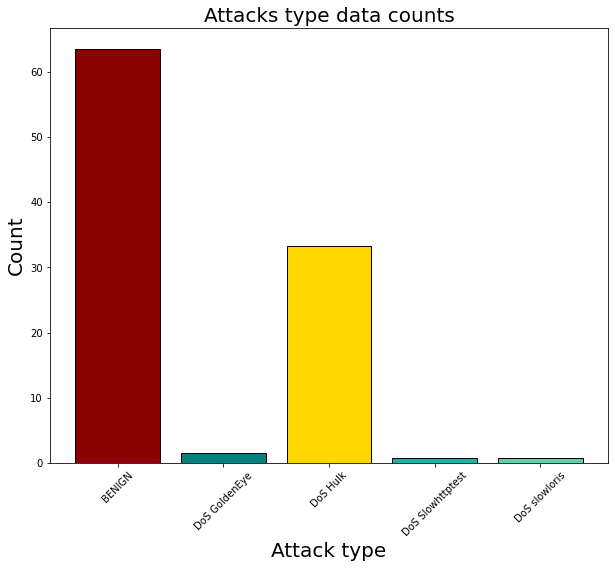

In [118]:
fig = plt.figure(figsize = (10,8))
r_ = [round(each, 2) for each in percent_data.values]
ax = fig.add_subplot(111)
ax.bar(percent_data.index, percent_data.values, color = ['darkred', 'teal', 'gold', 'lightseagreen', "mediumaquamarine"], edgecolor = 'black')
ax.set_xticklabels(percent_data.index, rotation = 45)
ax.set_xlabel("Attack type", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
ax.set_title("Attacks type data counts", fontsize = 20)


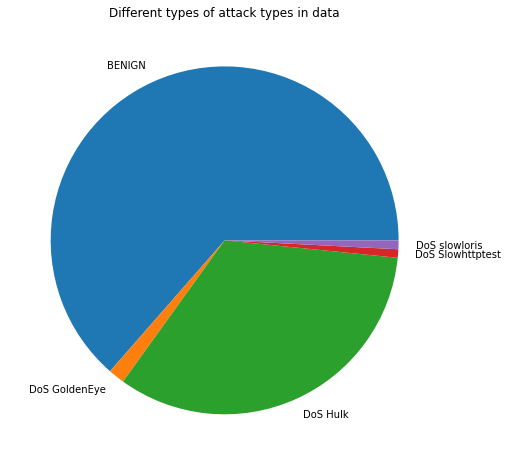

In [115]:
group_data = train_df.groupby('Label').size()
plt.figure(figsize = (10,8))
group_data.plot(kind='pie')
plt.title("Different types of attack types in data")
plt.ylabel("")
plt.show()

1.This creates a set of stop words using a variable called "sw". Stop words are common words like "a", "an", "the", and so on, that are typically removed from text before analysis.

2.This creates a word cloud using the "WordCloud" function from the "wordcloud" library. The "stopwords" argument is set to the stop words created in the previous line. The "generate" method is used to generate the word cloud from the "Label" column of the "train_df" DataFrame. The "str" function is used to convert the column to a string, which is required by the "WordCloud" function.


3.These lines set the size of the plot and the color of the lines in the plot using the "rcParams" function from the "matplotlib" library.

4.These lines display the word cloud using the "imshow" function from the "matplotlib" library. The title of the plot is set to "Most Highlighted Flags", and the axis is turned off using the "axis" function. The resulting plot is a visualization of the most common words in the "Label" column of the "train_df" DataFrame, with the size of each word indicating its frequency.

(-0.5, 399.5, 199.5, -0.5)

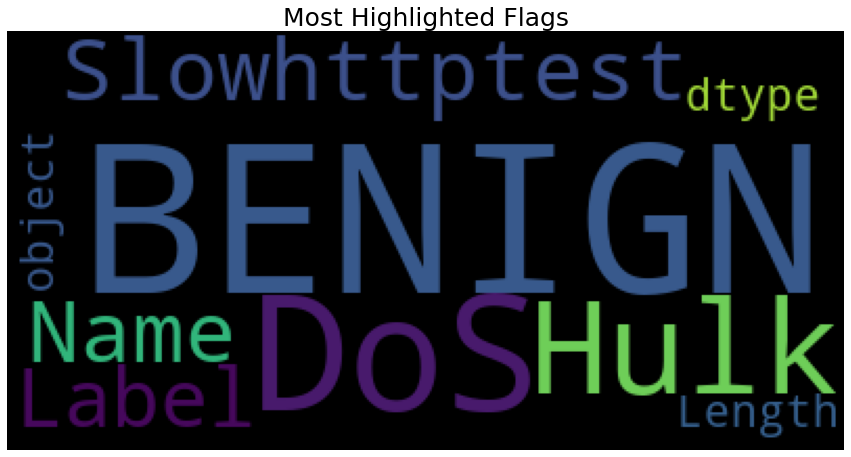

In [116]:
stop_words = set(sw)

word_cloud = wc(stopwords = stop_words).generate(str(train_df['Label']))

plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['lines.color'] = 'gold'
print(word_cloud)
plt.imshow(word_cloud)
plt.title('Most Highlighted Flags', fontsize = 25)
plt.axis("off")

    From the all the representation we can see the large share of "BENING"

# Pre-processing the data

#### Checking fo the missing values

1.The code snippet you provided checks for missing values in each column of a DataFrame called "train_df" and returns the sum of missing values for each column. Here's a breakdown of the code:

2.This generates a boolean DataFrame of the same shape as "train_df", where "True" values indicate missing values and "False" values indicate non-missing values.

In [80]:
train_df.isnull().sum()    # nan

ID                        0
Destination Port          0
Flow Duration             0
Total Fwd Packets         0
Total Backward Packets    0
                         ..
Idle Mean                 0
Idle Std                  0
Idle Max                  0
Idle Min                  0
Label                     0
Length: 80, dtype: int64

In [82]:
columns = train_df.columns
count = 0
for i in train_df.isnull().sum():
    print("{} : {}".format(columns[count],i))
    count+=1

ID : 0
Destination Port : 0
Flow Duration : 0
Total Fwd Packets : 0
Total Backward Packets : 0
Total Length of Fwd Packets : 0
Total Length of Bwd Packets : 0
Fwd Packet Length Max : 0
Fwd Packet Length Min : 0
Fwd Packet Length Mean : 0
Fwd Packet Length Std : 0
Bwd Packet Length Max : 0
Bwd Packet Length Min : 0
Bwd Packet Length Mean : 0
Bwd Packet Length Std : 0
Flow Bytes/s : 200
Flow Packets/s : 0
Flow IAT Mean : 0
Flow IAT Std : 0
Flow IAT Max : 0
Flow IAT Min : 0
Fwd IAT Total : 0
Fwd IAT Mean : 0
Fwd IAT Std : 0
Fwd IAT Max : 0
Fwd IAT Min : 0
Bwd IAT Total : 0
Bwd IAT Mean : 0
Bwd IAT Std : 0
Bwd IAT Max : 0
Bwd IAT Min : 0
Fwd PSH Flags : 0
Bwd PSH Flags : 0
Fwd URG Flags : 0
Bwd URG Flags : 0
Fwd Header Length : 0
Bwd Header Length : 0
Fwd Packets/s : 0
Bwd Packets/s : 0
Min Packet Length : 0
Max Packet Length : 0
Packet Length Mean : 0
Packet Length Std : 0
Packet Length Variance : 0
FIN Flag Count : 0
SYN Flag Count : 0
RST Flag Count : 0
PSH Flag Count : 0
ACK Flag Count

    We can see that there are 200 missing values in " Flow Bytes/s " column. so, we want to drop them.

#### Deopping the NULL recards

In [83]:
train_df = train_df.dropna()   # 200

In [84]:
train_df.shape     # (129879)-200

(129679, 80)

    we can see that, the number of records reduced to 129679 from 129879

#### Encoding the categorical columns into numeric

In [85]:
def attack_encode(value):
    if value == 'BENIGN':
        return 0;
    elif value == "DoS Slowhttptest":
        return 1;
    elif value == 'DoS Hulk':
        return 2;
    elif value == 'DoS GoldenEye':
        return 3;
    else:
        return 4;


In [86]:
train_df['intrusion_code'] = train_df['Label'].apply(attack_encode)
train_df.iloc[:10, -2:]   

,Label,intrusion_code
0,BENIGN,0
1,DoS Slowhttptest,1
2,DoS Hulk,2
3,BENIGN,0
4,DoS Hulk,2
5,BENIGN,0
6,BENIGN,0
7,DoS Hulk,2
8,BENIGN,0
9,BENIGN,0


In [87]:
numerical_cols = [one for each,one in zip(list(train_df.dtypes),train_df.dtypes.index)  if each == 'float64']
numerical_cols

['Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow Bytes/s',
 'Flow Packets/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'Average Packet Size',
 'Avg Fwd Segment Size',
 'Avg Bwd Segment Size',
 'Active Mean',
 'Active Std',
 'Idle Mean',
 'Idle Std']

In [88]:
train_df = train_df.drop(numerical_cols,axis = 1)


# Modeling Building

#### Eztracting the features

In [89]:
X = train_df.drop(['intrusion_code','Label'],axis = 1)    #    81-80 
y = train_df['intrusion_code']     # dep   

In [90]:
print(X.shape)
print(y.shape)

(129679, 55)
(129679,)


#### Spliting the data

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13) 

In [92]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(90775, 55)
(38904, 55)
(90775,)
(38904,)


In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

# Predictions and Evaluation of Decision Tree
Create predictions from the test set and create a classification report and a confusion matrix.

In [95]:
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24797
           1       0.99      0.99      0.99       293
           2       1.00      1.00      1.00     12905
           3       0.99      0.99      0.99       598
           4       0.96      0.96      0.96       311

    accuracy                           1.00     38904
   macro avg       0.99      0.99      0.99     38904
weighted avg       1.00      1.00      1.00     38904



In [96]:
cm=confusion_matrix(y_test,predictions)
print(cm)


[[24763     1    14     7    12]
 [    1   291     0     0     1]
 [   11     0 12893     1     0]
 [    5     0     3   590     0]
 [    8     3     0     0   300]]


In [97]:
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4])/cm.sum(),3))

Accuracy of prediction: 0.998


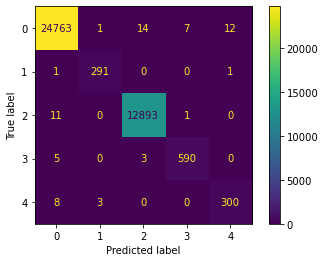

In [98]:
metrics.classification_report(y_test,predictions)
metrics.plot_confusion_matrix(dtree, X_test, y_test)  

# Test Dataset

#### Reading the dataset

In [71]:
test_df =  pd.read_csv("IDS_test.csv")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43294 entries, 0 to 43293
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           43294 non-null  int64  
 1   Destination Port             43294 non-null  int64  
 2   Flow Duration                43294 non-null  int64  
 3   Total Fwd Packets            43294 non-null  int64  
 4   Total Backward Packets       43294 non-null  int64  
 5   Total Length of Fwd Packets  43294 non-null  int64  
 6   Total Length of Bwd Packets  43294 non-null  int64  
 7   Fwd Packet Length Max        43294 non-null  int64  
 8   Fwd Packet Length Min        43294 non-null  int64  
 9   Fwd Packet Length Mean       43294 non-null  float64
 10  Fwd Packet Length Std        43294 non-null  float64
 11  Bwd Packet Length Max        43294 non-null  int64  
 12  Bwd Packet Length Min        43294 non-null  int64  
 13  Bwd Packet Lengt

# Data Pre-processing

In [72]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43294 entries, 0 to 43293
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           43294 non-null  int64  
 1   Destination Port             43294 non-null  int64  
 2   Flow Duration                43294 non-null  int64  
 3   Total Fwd Packets            43294 non-null  int64  
 4   Total Backward Packets       43294 non-null  int64  
 5   Total Length of Fwd Packets  43294 non-null  int64  
 6   Total Length of Bwd Packets  43294 non-null  int64  
 7   Fwd Packet Length Max        43294 non-null  int64  
 8   Fwd Packet Length Min        43294 non-null  int64  
 9   Fwd Packet Length Mean       43294 non-null  float64
 10  Fwd Packet Length Std        43294 non-null  float64
 11  Bwd Packet Length Max        43294 non-null  int64  
 12  Bwd Packet Length Min        43294 non-null  int64  
 13  Bwd Packet Lengt

In [73]:
test_df.isnull().sum()

ID                        0
Destination Port          0
Flow Duration             0
Total Fwd Packets         0
Total Backward Packets    0
                         ..
Active Min                0
Idle Mean                 0
Idle Std                  0
Idle Max                  0
Idle Min                  0
Length: 79, dtype: int64

In [74]:
columns = test_df.columns
count = 0
for i in test_df.isnull().sum():
    print("{} : {}".format(columns[count],i))
    count+=1

ID : 0
Destination Port : 0
Flow Duration : 0
Total Fwd Packets : 0
Total Backward Packets : 0
Total Length of Fwd Packets : 0
Total Length of Bwd Packets : 0
Fwd Packet Length Max : 0
Fwd Packet Length Min : 0
Fwd Packet Length Mean : 0
Fwd Packet Length Std : 0
Bwd Packet Length Max : 0
Bwd Packet Length Min : 0
Bwd Packet Length Mean : 0
Bwd Packet Length Std : 0
Flow Bytes/s : 56
Flow Packets/s : 0
Flow IAT Mean : 0
Flow IAT Std : 0
Flow IAT Max : 0
Flow IAT Min : 0
Fwd IAT Total : 0
Fwd IAT Mean : 0
Fwd IAT Std : 0
Fwd IAT Max : 0
Fwd IAT Min : 0
Bwd IAT Total : 0
Bwd IAT Mean : 0
Bwd IAT Std : 0
Bwd IAT Max : 0
Bwd IAT Min : 0
Fwd PSH Flags : 0
Bwd PSH Flags : 0
Fwd URG Flags : 0
Bwd URG Flags : 0
Fwd Header Length : 0
Bwd Header Length : 0
Fwd Packets/s : 0
Bwd Packets/s : 0
Min Packet Length : 0
Max Packet Length : 0
Packet Length Mean : 0
Packet Length Std : 0
Packet Length Variance : 0
FIN Flag Count : 0
SYN Flag Count : 0
RST Flag Count : 0
PSH Flag Count : 0
ACK Flag Count 

    There are missing values in Flow Bytes/s, we have to drop them

In [75]:
test_df = test_df.dropna()


In [76]:
numerical_cols = [one for each,one in zip(list(test_df.dtypes),test_df.dtypes.index)  if each == 'float64']
test_df = test_df.drop(numerical_cols,axis = 1)


In [99]:
X.shape

(129679, 55)

In [100]:
test_df.shape

(43238, 55)

#### Predictions for the test dataset

In [101]:
predictions = dtree.predict(test_df)


In [102]:
test_df["predictions"] = dtree.predict(test_df)

In [103]:
test_df

,ID,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,...,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Max,Active Min,Idle Max,Idle Min,predictions
0,0,80,99575743,7,5,401,11595,377,0,7240,...,11595,0,235,4,20,11993,11993,99400000,99400000,2
1,1,80,107429687,2,1,662,6,662,0,6,...,6,410,0,1,32,0,0,107000000,107000000,3
2,2,80,17291,2,0,12,0,6,6,0,...,0,253,-1,1,20,0,0,0,0,0
3,3,80,85038140,5,7,338,11595,326,0,5792,...,11595,0,235,2,20,12007,12007,84900000,84900000,2
4,4,80,82963302,8,6,375,11595,363,0,4344,...,11595,251,235,3,20,1983,1983,82800000,82800000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43289,43289,80,82746195,6,7,324,11595,306,0,5792,...,11595,0,235,3,20,14014,14014,82600000,82600000,2
43290,43290,53,183040,4,2,176,662,44,44,331,...,662,-1,-1,3,32,0,0,0,0,0
43291,43291,443,117811197,12,13,635,4068,198,0,2820,...,4068,8192,119,9,20,232944,140725,58700000,58600000,0
43292,43292,80,5023362,3,1,0,0,0,0,0,...,0,29200,65535,0,32,0,0,0,0,0


In [119]:
test_df.predictions.unique()

array([2, 3, 0, 4, 1], dtype=int64)

In [121]:
train_df.Label.unique()

array(['BENIGN', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'DoS slowloris'], dtype=object)

#### Labeling the predictions

In [122]:
def attack_encode(value):
    if value == 0:
        return "BENIGN";
    elif value == 1:
        return "DoS Slowhttptest";
    elif value == 2:
        return 'DoS Hulk';
    elif value == 3:
        return 'DoS GoldenEye';
    else:
        return 'DoS slowloris';


In [123]:
test_df['Label'] = test_df['predictions'].apply(attack_encode)
test_df.iloc[:10, -2:]

,predictions,Label
0,2,DoS Hulk
1,3,DoS GoldenEye
2,0,BENIGN
3,2,DoS Hulk
4,2,DoS Hulk
5,2,DoS Hulk
6,0,BENIGN
7,2,DoS Hulk
8,2,DoS Hulk
9,2,DoS Hulk


In [124]:
test_df

,ID,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,...,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Max,Active Min,Idle Max,Idle Min,predictions,Label
0,0,80,99575743,7,5,401,11595,377,0,7240,...,0,235,4,20,11993,11993,99400000,99400000,2,DoS Hulk
1,1,80,107429687,2,1,662,6,662,0,6,...,410,0,1,32,0,0,107000000,107000000,3,DoS GoldenEye
2,2,80,17291,2,0,12,0,6,6,0,...,253,-1,1,20,0,0,0,0,0,BENIGN
3,3,80,85038140,5,7,338,11595,326,0,5792,...,0,235,2,20,12007,12007,84900000,84900000,2,DoS Hulk
4,4,80,82963302,8,6,375,11595,363,0,4344,...,251,235,3,20,1983,1983,82800000,82800000,2,DoS Hulk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43289,43289,80,82746195,6,7,324,11595,306,0,5792,...,0,235,3,20,14014,14014,82600000,82600000,2,DoS Hulk
43290,43290,53,183040,4,2,176,662,44,44,331,...,-1,-1,3,32,0,0,0,0,0,BENIGN
43291,43291,443,117811197,12,13,635,4068,198,0,2820,...,8192,119,9,20,232944,140725,58700000,58600000,0,BENIGN
43292,43292,80,5023362,3,1,0,0,0,0,0,...,29200,65535,0,32,0,0,0,0,0,BENIGN


#### Converting the above dataset into csv file

In [127]:

test_df.to_csv('IDS_test_with_Predictions.csv')
